# Tempo de Reação

## Este python notebook produz um histograma  junto com uma curva gaussiana para um conjunto de dados relativo ao tempo de reação devido ao um estímulo visual. Os dados foram gerados utilizando :

https://faculty.washington.edu/chudler/java/redgreen.html

## Este estudo faz parte do curso de Física I Experimental do Instituto de Física da Universidade Federal Fluminense

https://portal.if.uff.br/

[ 7. 13. 10.  6.  2.  1.  0.  0.  0.  1.]
[0.219  0.2397 0.2604 0.2811 0.3018 0.3225 0.3432 0.3639 0.3846 0.4053
 0.426 ]
0.020699999999999996


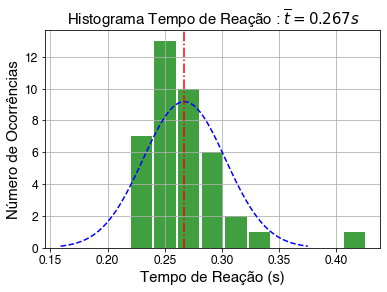

In [18]:
import matplotlib.pyplot as plt # biblioteca para gráficos 
import numpy as np              # biblioteca matemática

####################################################
# definindo fonte
####################################################
hfont = {'fontname':'Helvetica'}

####################################################
# incializando o array data com os valores contidos em data.dat
####################################################
data = np.loadtxt("data2.dat",dtype=float) 

N=data.shape[0] # tamanho do conjunto de dados data.dat
                # a função shape da o tamanho do array data

####################################################
# Cálculo da média
####################################################
mu = np.sum(data)/float(N)

####################################################
# Cálculo do desvio padrão
####################################################
soma=0.0
for i in range(N):        # loop por todos os valores de xi
    soma+=(data[i]-mu)**2 # (xi - x_medio)^2

std=np.sqrt(soma/(float(N)-1)) # desvio padrão.

####################################################
# Resolução 
####################################################

mu = round(mu,3)    # como a resolução do simulador é 0.001 s
                    # a média e o desvio padrão devem ter 3 casas decimais.
std = round(std,3)


####################################################
# Inicializado o gráfico
####################################################
fig, ax = plt.subplots()

####################################################
# Ajustando detalhes do gráfico
####################################################
# descrição eixo-x
ax.set_xlabel('Tempo de Reação (s)',fontsize=15,**hfont) 

# descrição eixo-y
ax.set_ylabel('Número de Ocorrências',fontsize=15,**hfont)          

# Título do gráfico
ax.set_title(r'Histograma Tempo de Reação : $\overline{t}=%.3f s$'%(mu),fontsize=15,**hfont)

# inclui um grid no gráfico
plt.grid(True)

# Tamanho e tipo das fontes para o eixo x e y
plt.xticks(fontsize=12, rotation=0,**hfont)
plt.yticks(fontsize=12, rotation=0,**hfont)


####################################################
# Histograma
####################################################
# Lista com a largura dos bins. Notem que no meu caso a largura é de 0.025
# Testem outros valores para ver como o histograma se modifica.
#bin_list=[0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4]
#bin_list=[0.22,0.24,0.26,0.28,0.30,0.32,0.34,0.36,0.38,0.40]
bin_list=[0.22,0.237,0.254,0.271,0.288,0.305,0.322,0.339,0.356,0.373,0.39,0.407]
bin_list=[0.188,0.222, 0.256, 0.29,  0.324, 0.358, 0.392, 0.426]
####################################################
# Criando o histograma
####################################################
n, bins,patch = ax.hist(data, bins = 10 ,density=False,facecolor='green',alpha=0.75,rwidth=0.9)
print(n)
print(bins)
# data é o conjunto de dados
# bins é a lista com os intervalos dos bins

# rwidth é a largura das barras do gráfico. Estou usando 0.9 para evitar
# que as barras fiquem sobrepostas. Testem utilizar 1.0 para ver como fica.


####################################################
# Gráfico de uma Gaussiana
####################################################
# Distribuição Gaussiana : https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_normal

bin_width=bins[1]-bins[0] # largura do bin

x2 = np.linspace(mu - 3*std, mu + 3*std, 100)
f = np.exp(-np.square(x2-mu)/(2*np.square(std)))/(std*np.sqrt(2*np.pi))

f=f*(bin_width*N)


ax.plot(x2,f,color="blue",linestyle="--")
print(bin_width)
####################################################
# Incluindo linha vertical para a média
####################################################
plt.axvline(mu, 0, 15,color="red",linestyle="-.") 

####################################################
# salvando para um arquivo
####################################################
plt. savefig('histograma-tempo-reacao-gaussiana.jpg', dpi=300, bbox_inches='tight')

####################################################
# Mostrando o gráfico
####################################################
plt.show()

